In [386]:
import numpy as np 
import pandas as pd 

In [387]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\digit-recognizer\digit_recognizer.csv")

In [388]:
df.shape

(42000, 785)

In [389]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
29431      0       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
29431       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
29431         0         0         0         0         0  

[1 rows x 785 columns]

In [390]:
import matplotlib.pyplot as plt

In [391]:
df.iloc[18306,1:].values.shape

(784,)

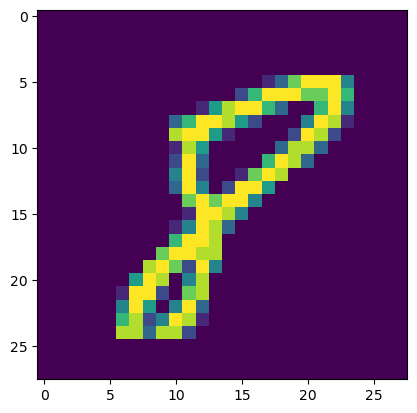

In [392]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

In [393]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [394]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [395]:
X_train.shape

(33600, 784)

In [396]:
from sklearn.neighbors import KNeighborsClassifier

In [397]:
knn = KNeighborsClassifier()

In [398]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [399]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

21.252063274383545


In [400]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [401]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [402]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [403]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [404]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf= pca.transform(X_test)

In [405]:
X_train_trf.shape

(33600, 200)

In [406]:
knn = KNeighborsClassifier()

In [407]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [408]:
y_pred = knn.predict(X_test_trf)

In [409]:
accuracy_score(y_test,y_pred)

0.9501190476190476

In [410]:
for i in range(1,15):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))
    

0.25761904761904764
0.3238095238095238
0.5105952380952381
0.6660714285714285
0.7377380952380952
0.8226190476190476
0.8438095238095238
0.8717857142857143
0.8858333333333334
0.9054761904761904
0.9126190476190477
0.9179761904761905
0.9276190476190476
0.934404761904762


In [411]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [412]:
X_train_trf.shape

(33600, 2)

In [413]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [414]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [415]:
X_train_trf

array([[-2.71863037, -0.4898027 ,  1.13566964],
       [-0.67700065, -6.75345277, -2.33544232],
       [-3.03321475,  6.50973129,  7.49153242],
       ...,
       [ 2.14884245,  0.78063902, -0.74740963],
       [ 1.05957092,  0.94770015,  3.9498951 ],
       [17.7025437 ,  1.96223468, -4.94301337]])

In [416]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [417]:
pca.explained_variance_

array([40.67111198, 29.17023397, 26.74459609])

In [418]:
pca.explained_variance_.shape
# Eigen values

(3,)

In [419]:
pca.components_

array([[-9.31118878e-17, -1.32278389e-18,  1.54019626e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 4.00819692e-17,  5.78672708e-18, -6.50706618e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-9.56806493e-17,  1.84259983e-17, -3.18688088e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [420]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [421]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [422]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [423]:
pca.explained_variance_.shape

(784,)

In [424]:
pca.components_.shape

(784, 784)

In [425]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

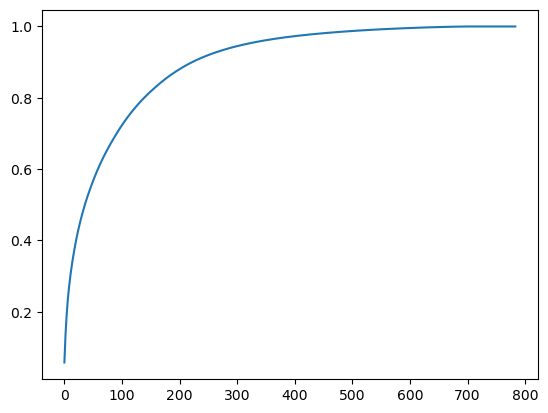

In [426]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))